# Import Lib

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
import cv2

# Load Dataset

In [2]:
# load fashion dataset for clothing from MNIST
dataset = tf.keras.datasets.fashion_mnist

# split data to train and test datasets
(train_images, train_labels), (test_images, test_labels) = dataset.load_data()

4422102/4422102 [==============================] - 0s 0us/step


# Explore Dataset

In [3]:
# explore train dataset
print (f"train dataset includes {len(train_images)} images of shape {train_images.shape[1]} * {train_images.shape[2]}")

# explore test dataset
print (f"test dataset includes {len(test_images)} images of shape {test_images.shape[1]} * {test_images.shape[2]}")

# explore labels
print(f"labes range from {min(train_labels)} to {max(train_labels)}")


train dataset includes 60000 images of shape 28 * 28
test dataset includes 10000 images of shape 28 * 28
labes range from 0 to 9


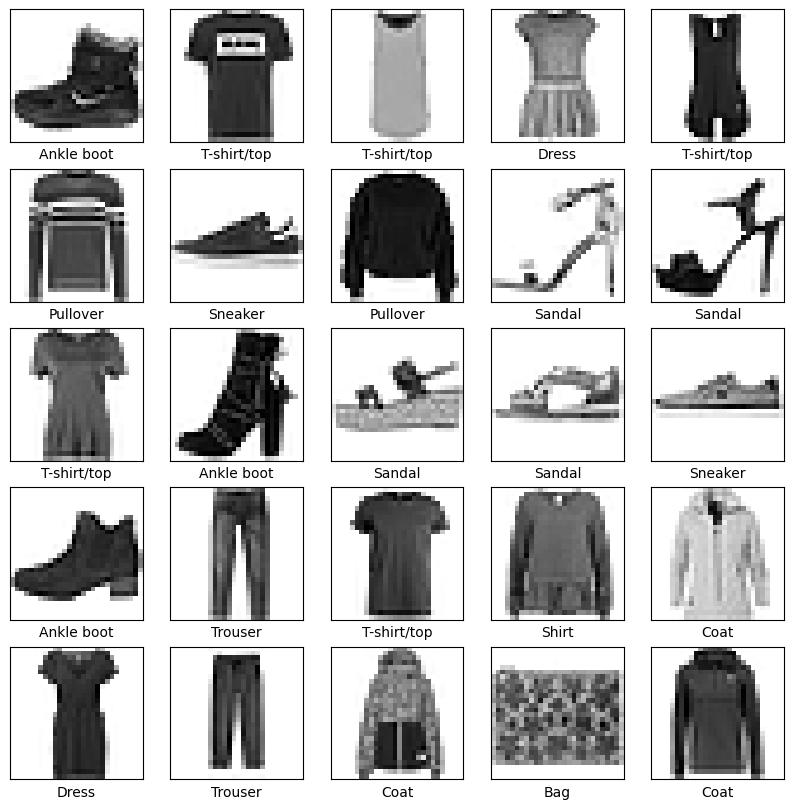

In [4]:
# fashion dataset of MNIST includes clothing images in 10 different classes which are labeled from 0 to 9
# class names are given below acording to labels in dataset
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# showing first 25 images of the dataset along with their classes
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

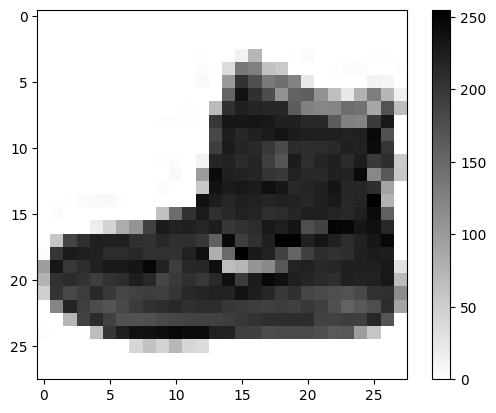

In [5]:
# expolring the first image in the dataset
plt.imshow(train_images[0], cmap=plt.cm.binary)
plt.colorbar()
plt.show()

# Preprocess Data


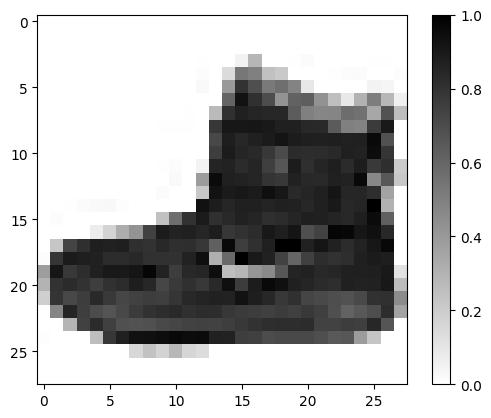

In [6]:
# pixel values for each image range from 0 to 255.
# Normalize pixel values
train_images = train_images / 255.0
test_images = test_images / 255.0

# show first image after normalization
plt.imshow(train_images[0], cmap=plt.cm.binary)
plt.colorbar()
plt.show()

# Define Model

In [7]:
model = models.Sequential(
    [
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(10, activation='softmax')
    ]
)

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 1, 1, 128)         0

# Train Model

In [8]:
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 56s 29ms/step - loss: 0.5723 - accuracy: 0.7889 - val_loss: 0.4843 - val_accuracy: 0.8208
Epoch 2/10
1875/1875 [==============================] - 55s 29ms/step - loss: 0.3810 - accuracy: 0.8608 - val_loss: 0.3646 - val_accuracy: 0.8682
Epoch 3/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.3224 - accuracy: 0.8812 - val_loss: 0.3456 - val_accuracy: 0.8717
Epoch 4/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.2855 - accuracy: 0.8942 - val_loss: 0.3302 - val_accuracy: 0.8794
Epoch 5/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.2575 - accuracy: 0.9036 - val_loss: 0.3110 - val_accuracy: 0.8890
Epoch 6/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.2356 - accuracy: 0.9118 - val_loss: 0.3129 - val_accuracy: 0.8884
Epoch 7/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.2139 - accuracy: 0.9197 - val_loss: 0.3146 -

# Evaluate Model

In [9]:
model.evaluate(test_images, test_labels, verbose=1)

313/313 [==============================] - 3s 8ms/step - loss: 0.3120 - accuracy: 0.8974


[0.31195318698883057, 0.8974000215530396]

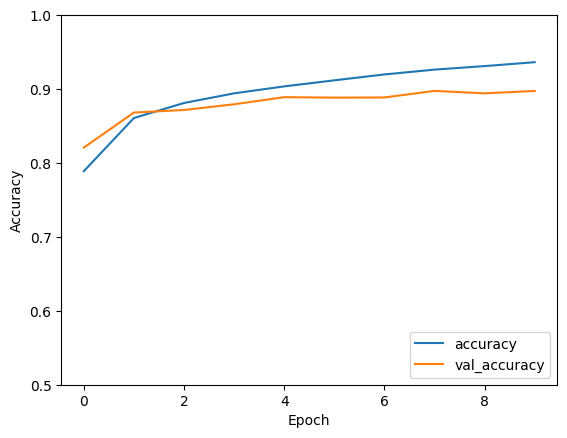

In [10]:
# plot the progress
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

# Predict Results

In [11]:
# predict results for test set
predictions = model.predict(test_images)
print(predictions[0])

313/313 [==============================] - 3s 8ms/step
[2.8964919e-08 4.7900102e-09 1.4759294e-10 1.3837188e-08 5.9806181e-11
 4.9927934e-07 5.6782209e-08 5.8466462e-06 1.6887766e-09 9.9999350e-01]


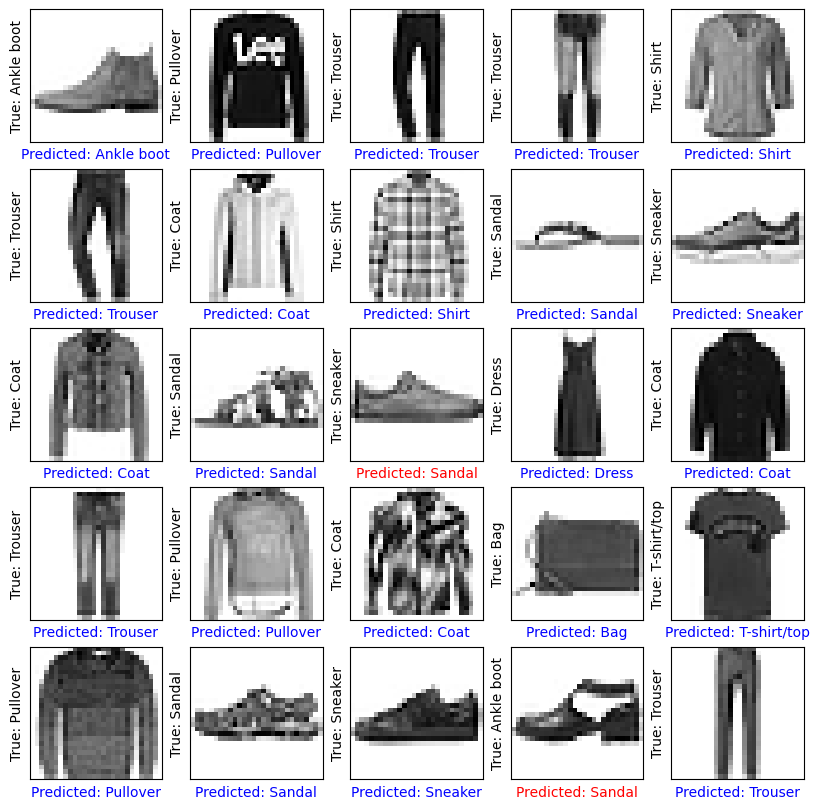

In [15]:
# Plot first 25 images in the test set with predicted and true labels
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions[i])
    true_label = test_labels[i]
    color = 'blue' if predicted_label == true_label else 'red'
    plt.xlabel(f"Predicted: {class_names[predicted_label]}", color=color)
    plt.ylabel(f"True: {class_names[true_label]}")
plt.show()
